In [1]:
import tensorflow as tf
from tensorflow import keras
import glob
import random
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digit_classifier = keras.models.load_model('./trained_models/digit_classifier.h5')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
digit_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


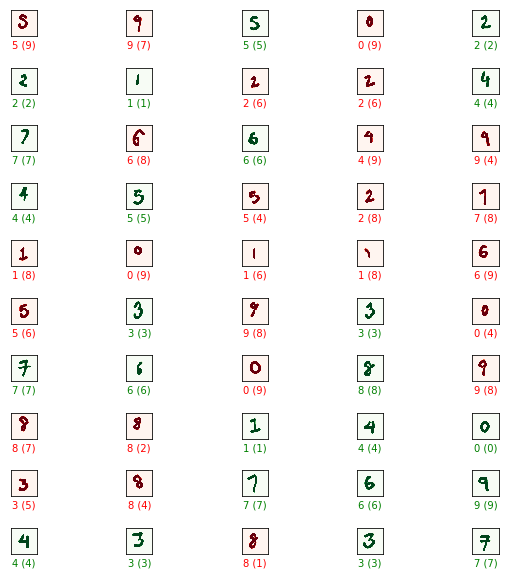

In [4]:
test_images = glob.glob('./test_digits/*')
count = 1
correct_count = 0
plt.figure(figsize = (10, 10))
plt.title("Predicted Label (Actual Label)", loc='center', pad = 2)
for i in range(50):
    test_image = test_images[i]
    test_label = os.path.basename(test_image)[0]
    
    img = mpimg.imread(test_image)
    
    prediction = str(np.argmax(digit_classifier.predict(img.reshape(1, 28, 28))))
    
    plt.subplot(10, 5, count)
    plt.subplots_adjust(hspace=1.2)
    
    if(test_label == prediction):
        cmap, color = 'Greens', 'green'
        correct_count = correct_count + 1
    else:
        cmap, color = 'Reds', 'red'
        color = 'red'
    
    plt.imshow(img, cmap = cmap)
    plt.xlabel(test_label + " ("+str(prediction)+")", color = color)
    plt.xticks([])
    plt.yticks([])
    
    count = count + 1

In [5]:
print("Accuracy percentage: ", 100.*correct_count/50., "%")

Accuracy percentage:  48.0 %


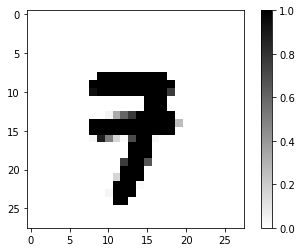

In [6]:
# Checking to see if the images look fine (artifact free, primarily)
plt.imshow(img, cmap = 'binary')
plt.colorbar()

#### Let's do a sanity check by running the MNIST test dataset through the network

In [8]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [9]:
test_loss, test_accuracy = digit_classifier.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.3194 - acc: 0.9801


#### Sure enough, the accuracy on the test set is 98% - are we overfitting to the MNIST set?

In [10]:
train_loss, train_accuracy = digit_classifier.evaluate(train_images, train_labels)

60000/60000 [==============================] - 3s 42us/sample - loss: 0.0192 - acc: 0.9988


Similarly high performance on the training set

### Let's retrain the model here, then plot it's accuracy over time

In [11]:
history = digit_classifier.fit(partial_x_train, partial_y_train, validation_data=(x_val, y_val), epochs = 20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 122us/sample - loss: 0.2883 - acc: 0.9821 - val_loss: 0.4239 - val_acc: 0.9737
Epoch 2/20
50000/50000 [==============================] - 6s 118us/sample - loss: 0.9841 - acc: 0.9387 - val_loss: 0.8171 - val_acc: 0.9493
Epoch 3/20
50000/50000 [==============================] - 6s 117us/sample - loss: 0.8442 - acc: 0.9475 - val_loss: 1.3476 - val_acc: 0.9160
Epoch 4/20
50000/50000 [==============================] - 6s 118us/sample - loss: 1.1017 - acc: 0.9315 - val_loss: 1.4529 - val_acc: 0.9097
Epoch 5/20
50000/50000 [==============================] - 6s 116us/sample - loss: 0.7906 - acc: 0.9508 - val_loss: 0.8565 - val_acc: 0.9467
Epoch 6/20
50000/50000 [==============================] - 6s 118us/sample - loss: 1.1084 - acc: 0.9311 - val_loss: 1.5138 - val_acc: 0.9059
Epoch 7/20
50000/50000 [==============================] - 6s 122us/sample - loss: 1.1237 - acc: 0.9302 - val_l

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

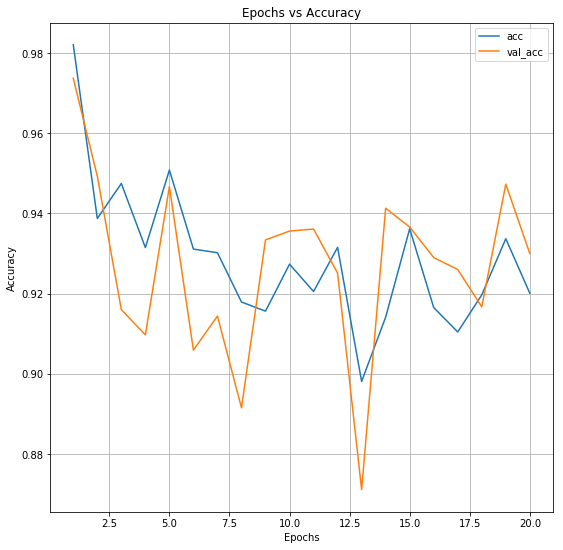

In [13]:
from matplotlib import pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(9, 9))
plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc, label = 'val_acc')
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

### Why not test on the network after re-training?

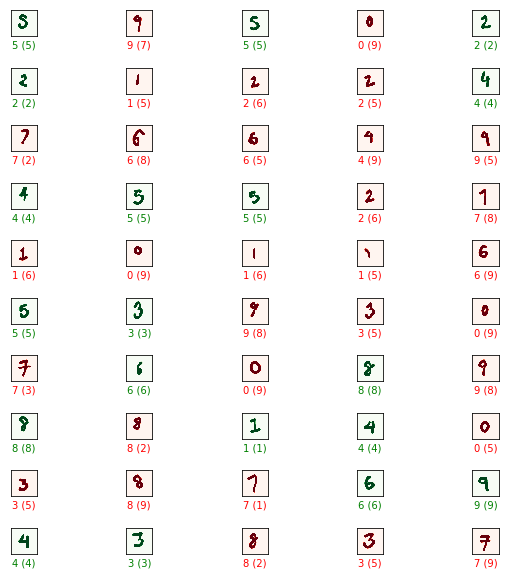

In [14]:
test_images = glob.glob('./test_digits/*')
count = 1
correct_count = 0
plt.figure(figsize = (10, 10))
plt.title("Predicted Label (Actual Label)", loc='center', pad = 2)
for i in range(50):
    test_image = test_images[i]
    test_label = os.path.basename(test_image)[0]
    
    img = mpimg.imread(test_image)
    
    prediction = str(np.argmax(digit_classifier.predict(img.reshape(1, 28, 28))))
    
    plt.subplot(10, 5, count)
    plt.subplots_adjust(hspace=1.2)
    
    if(test_label == prediction):
        cmap, color = 'Greens', 'green'
        correct_count = correct_count + 1
    else:
        cmap, color = 'Reds', 'red'
        color = 'red'
    
    plt.imshow(img, cmap = cmap)
    plt.xlabel(test_label + " ("+str(prediction)+")", color = color)
    plt.xticks([])
    plt.yticks([])
    
    count = count + 1

In [15]:
print("Accuracy percentage: ", 100.*correct_count/50., "%")

Accuracy percentage:  38.0 %


### After re-training, my network is doing worse?!